In [24]:
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier,GradientBoostingRegressor,ExtraTreesRegressor
import numpy as np
import pandas as pd
from pandas import DataFrame
import matplotlib.pyplot as plt
import matplotlib.pyplot as plot
import seaborn as sns


In [25]:
data = pd.read_csv("RFECaO.csv")

In [26]:
data

,apol,AMR,nBondsS2,Sv,Sse,Spe,Si,TSRW,band gap(eV),Feimi energy(eV),HOMO,Adsorption Energy(eV)
0,1.333586,0.0000,1,0.541828,1.887837,1.725490,16.285560,0.000000,3.771,-3.688,-5.640,-0.158610
1,1.902000,1.4429,0,1.472763,2.493809,2.541176,16.857575,2.564949,1.178,-4.731,-4.723,-0.224061
2,1.604000,2.8858,0,1.429598,2.661326,2.698039,16.309042,2.564949,1.052,-3.832,-5.803,-0.262291
3,3.364000,6.3844,0,2.429598,3.661326,3.698039,23.051737,4.852030,3.744,-3.628,-5.566,-0.273622
4,8.570379,17.5954,4,4.101491,6.004006,5.749020,44.987862,4.852030,3.623,-3.611,-5.474,-0.274729
5,6.810379,14.2958,4,3.101491,5.004006,4.749020,38.245167,2.564949,3.390,-3.559,-5.321,-0.276302
6,2.200000,0.0000,0,1.515927,2.326293,2.384314,17.406108,2.564949,3.159,-4.009,-5.614,-0.292275
7,2.771000,6.3699,3,2.697628,5.533139,5.874510,40.001497,6.594413,3.027,-3.986,-5.558,-0.310123
8,10.700000,27.8924,1,3.159940,2.023307,2.086275,12.516479,2.564949,1.151,-5.272,-5.948,-0.350428
9,3.002000,4.4450,0,2.230726,3.656956,3.733333,25.560629,4.852030,3.536,-3.831,-5.638,-0.367286


In [7]:
featureData=data.values[:,0:-1]
print(type(featureData),featureData.shape)

<class 'numpy.ndarray'> (100, 11)


In [9]:
homo= data.values[:, -1]
featurename=data[0:0:-1]
print(featurename)

Empty DataFrame
Columns: [apol, AMR, nBondsS2, Sv, Sse, Spe, Si, TSRW, band gap(eV), Feimi energy(eV), HOMO, Adsorption Energy(eV)]
Index: []


In [10]:
rf = ExtraTreesRegressor(n_estimators=150)
rf.fit(featureData, homo)
print("Features sorted by their score:")
print(sorted(zip(map(lambda x: round(x, 4), rf.feature_importances_), featurename), reverse=True))

Features sorted by their score:
[(0.1543, 'TSRW'), (0.1409, 'Sv'), (0.133, 'AMR'), (0.1132, 'apol'), (0.0905, 'Spe'), (0.0844, 'Sse'), (0.0733, 'Si'), (0.0721, 'Feimi energy(eV)'), (0.0704, 'nBondsS2'), (0.0408, 'HOMO'), (0.0271, 'band gap(eV)')]


In [27]:
featureData=data.iloc[:,:]
corMat = DataFrame(featureData.corr())  #corr 求相关系数矩阵
print(corMat)

                           apol       AMR  nBondsS2        Sv       Sse  \
apol                   1.000000  0.964072  0.744273  0.990738  0.951293   
AMR                    0.964072  1.000000  0.569763  0.962886  0.856454   
nBondsS2               0.744273  0.569763  1.000000  0.713729  0.867063   
Sv                     0.990738  0.962886  0.713729  1.000000  0.955298   
Sse                    0.951293  0.856454  0.867063  0.955298  1.000000   
Spe                    0.954261  0.865541  0.853603  0.961528  0.999416   
Si                     0.925282  0.810549  0.901076  0.922218  0.994076   
TSRW                   0.767357  0.763163  0.609680  0.801417  0.778426   
band gap(eV)           0.048505 -0.024359  0.277839 -0.000117  0.094060   
Feimi energy(eV)      -0.053878 -0.105789  0.189785 -0.088747  0.001242   
HOMO                  -0.058517 -0.045479 -0.034692 -0.049659 -0.050342   
Adsorption Energy(eV) -0.698439 -0.679010 -0.585780 -0.696065 -0.693378   

                        

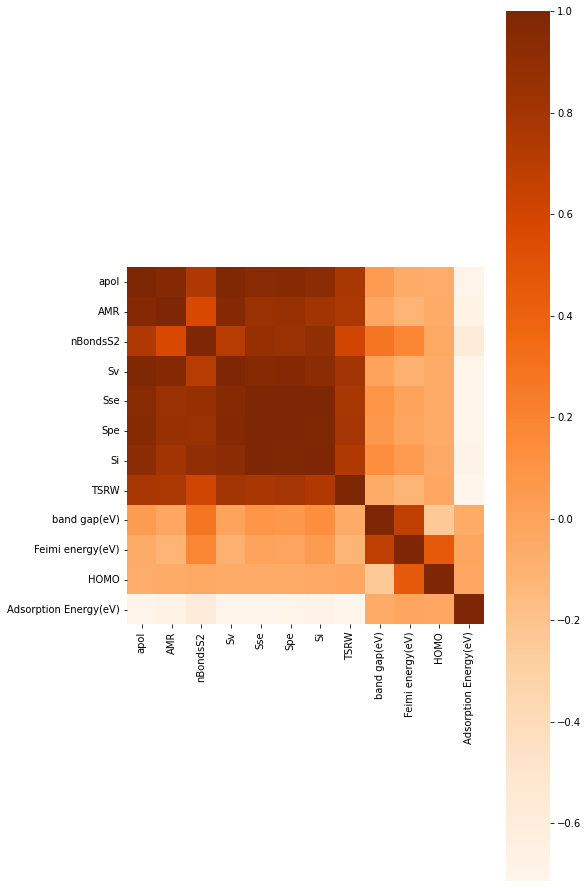

In [45]:
plt.figure(figsize=(8,16))
sns.heatmap(corMat, annot=False, vmax=1, square=True, cmap="Oranges",linewidths=0)
plot.show()